In [216]:
import pandas as pd
import pickle
import seaborn as sns

# Necessary imports
import statsmodels.api as sm
import statsmodels.formula.api as smf
import patsy
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import scipy.stats as stats
%matplotlib inline

In [217]:
def diagnostic_plot(x, y):
    plt.figure(figsize=(20,5))
    
    rgr = LinearRegression()
    rgr.fit(x,y)
    pred = rgr.predict(x)

    plt.subplot(1, 3, 1)
    plt.scatter(x,y)
    plt.plot(x, pred, color='blue',linewidth=1)
    plt.title("Regression fit")
    plt.xlabel("x")
    plt.ylabel("y")
    
    plt.subplot(1, 3, 2)
    res = y - pred
    plt.scatter(pred, res)
    plt.title("Residual plot")
    plt.xlabel("prediction")
    plt.ylabel("residuals")
    
    plt.subplot(1, 3, 3)
    #Generates a probability plot of sample data against the quantiles of a 
    # specified theoretical distribution 
    stats.probplot(res, dist="norm", plot=plt)
    plt.title("Normal Q-Q plot")

In [218]:
new_era = pickle.load(open('ready_for_model_new_era.p','rb'))
new_era['new_era'] = 1
new_era['old_era'] = 0

In [219]:
new_era.sample(5)

,ORtg_p1,ORtg_p2,ORtg_p3,ORtg_p4,ORtg_p5,DRtg_p1,DRtg_p2,DRtg_p3,DRtg_p4,DRtg_p5,win_per,year,new_era,old_era
4,120.0,118.0,114.0,114.0,110.0,115.0,110.0,109.0,108.0,104.0,0.621951,2019,1,0
22,118.0,117.0,113.0,110.0,107.0,114.0,113.0,111.0,110.0,108.0,0.475610,2019,1,0
194,122.0,121.0,117.0,117.0,111.0,107.0,103.0,103.0,101.0,100.0,0.731707,2013,1,0
16,121.0,118.0,116.0,113.0,105.0,113.0,112.0,111.0,109.0,105.0,0.646341,2019,1,0
0,120.0,119.0,119.0,115.0,113.0,108.0,108.0,107.0,105.0,105.0,0.707317,2019,1,0


In [220]:
old_era = pickle.load(open('ready_for_model_old_era.p','rb'))
old_era['old_era'] = 1
old_era['new_era'] = 0

In [221]:
old_era.sample(5)

,ORtg_p1,ORtg_p2,ORtg_p3,ORtg_p4,ORtg_p5,DRtg_p1,DRtg_p2,DRtg_p3,DRtg_p4,DRtg_p5,win_per,year,old_era,new_era
70,118.0,110.0,109.0,108.0,105.0,110,108,106,104,102,0.560976,1996,1,0
68,116.0,114.0,113.0,112.0,101.0,112,109,108,106,106,0.560976,1996,1,0
44,125.0,121.0,118.0,116.0,114.0,106,105,104,101,100,0.780488,1997,1,0
34,112.0,108.0,107.0,105.0,98.0,114,112,111,111,109,0.182927,1997,1,0
107,127.0,126.0,118.0,115.0,107.0,108,108,107,107,102,0.695122,1995,1,0


In [222]:
combined_data = pd.concat([new_era,old_era])

/Users/williamyee/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


In [223]:
combined_data['win_per']=combined_data['win_per']*100

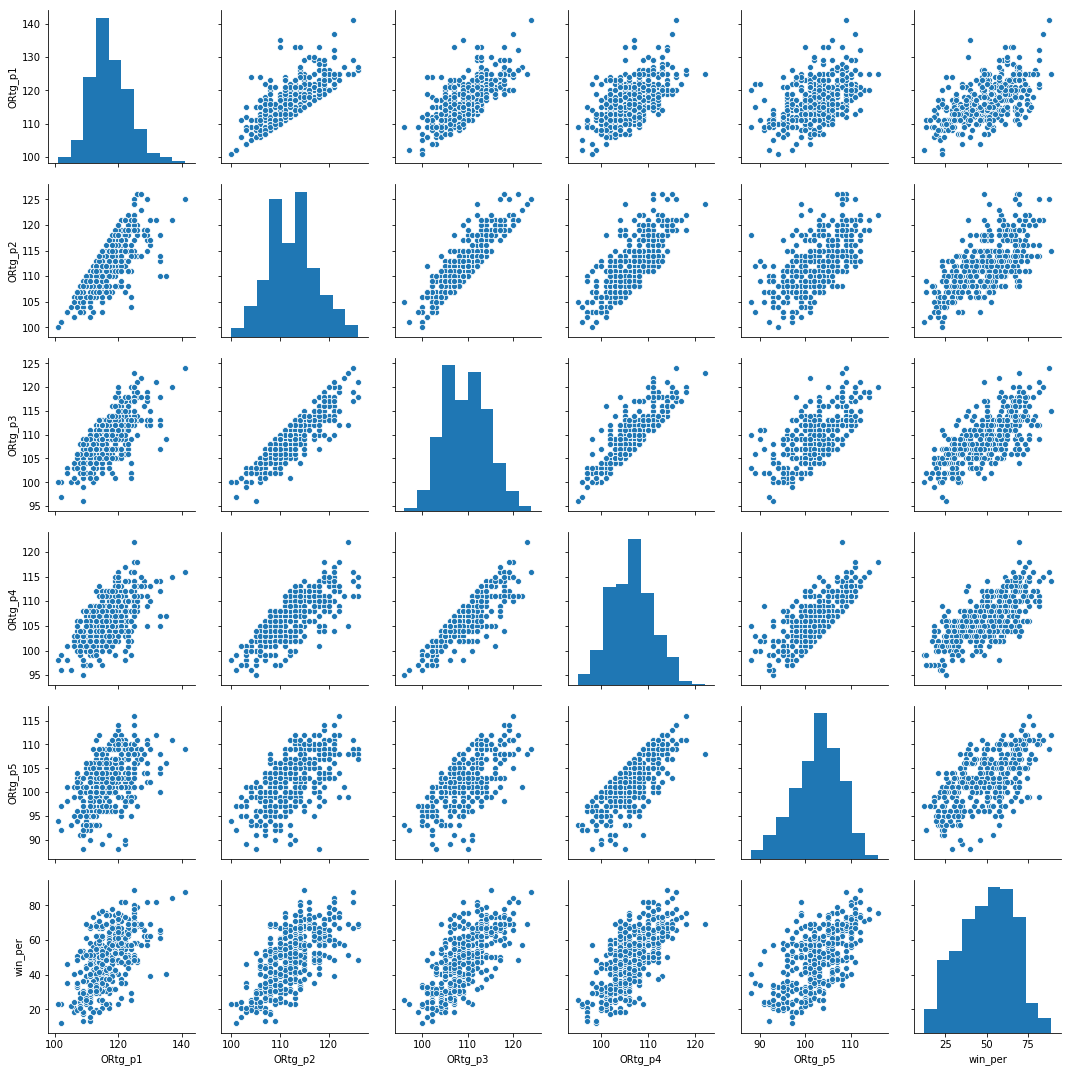

In [224]:
sns.pairplot(combined_data.loc[:,['ORtg_p1', 'ORtg_p2','ORtg_p3','ORtg_p4','ORtg_p5','win_per']]);

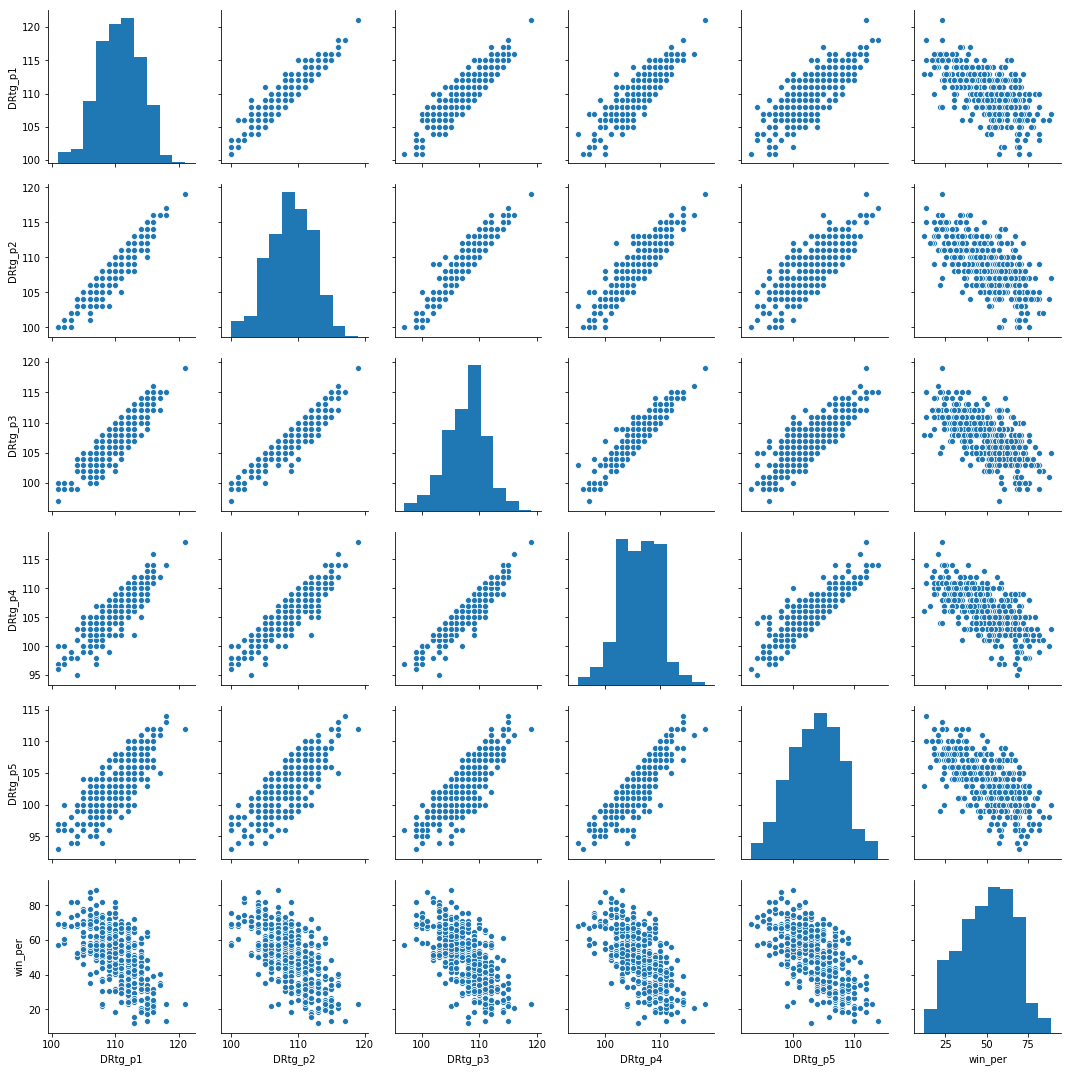

In [225]:
sns.pairplot(combined_data.loc[:,['DRtg_p1', 'DRtg_p2','DRtg_p3','DRtg_p4','DRtg_p5','win_per']]);

In [226]:
# Create your feature matrix (X) and target vector (y)
y, X = patsy.dmatrices('win_per ~ ORtg_p1 + ORtg_p2+ ORtg_p3+ ORtg_p4+ ORtg_p5 + DRtg_p1 + DRtg_p2+ DRtg_p3+ DRtg_p4+ DRtg_p5 + new_era + old_era', data=combined_data, return_type="dataframe")



# Create your model
model = sm.OLS(y, X)

# Fit your model to your training set
fit = model.fit()

# Print summary statistics of the model's performance
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                win_per   R-squared:                       0.859
Model:                            OLS   Adj. R-squared:                  0.855
Method:                 Least Squares   F-statistic:                     217.5
Date:                Fri, 12 Apr 2019   Prob (F-statistic):          1.56e-159
Time:                        18:40:12   Log-Likelihood:                -1303.4
No. Observations:                 405   AIC:                             2631.
Df Residuals:                     393   BIC:                             2679.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     52.1991      9.293      5.617      0.000      33.930      70.469
ORtg_p1        0.3254      0.078      4.161      0.000       0.172       0.479
ORtg_p2        0.6075      0.144      4.229      0.000       0.325       0.890
ORtg_p3        0.3856      0.167      2.306      0.022       0.057       0.714
ORtg_p4        0.6390      0.150      4.268      0.000       0.345       0.933
ORtg_p5        0.4171      0.093      4.474      0.000       0.234       0.600
DRtg_p1       -0.6722      0.278     -2.419      0.016      -1.218      -0.126
DRtg_p2       -0.9938      0.344     -2.891      0.004      -1.670      -0.318
DRtg_p3        0.0115      0.313      0.037      0.971      -0.604       0.627
DRtg_p4       -0.4647      0.263     -1.769      0.078      -0.981       0.052
DRtg_p5       -0.5522      0.156     -3.545      0.000      -0.858      -0.246
new_era       26.9271      4.661      5.777      0.000      17.764      36.090
old_era       25.2720      4.653      5.431      0.000      16.124      34.420
==============================================================================
Omnibus:                        1.429   Durbin-Watson:                   2.099
Prob(Omnibus):                  0.489   Jarque-Bera (JB):                1.417
Skew:                           0.068   Prob(JB):                        0.493
Kurtosis:                       2.745   Cond. No.                     7.77e+17
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 7.89e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

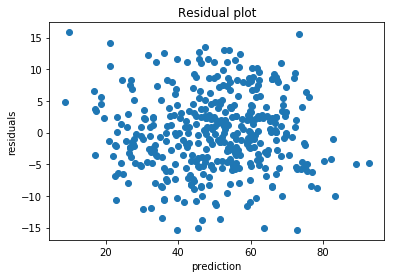

In [227]:
pred = fit.predict(X)
res = y.iloc[:,0] - pred
plt.scatter(pred, res)
plt.title("Residual plot")
plt.xlabel("prediction")
plt.ylabel("residuals");
    


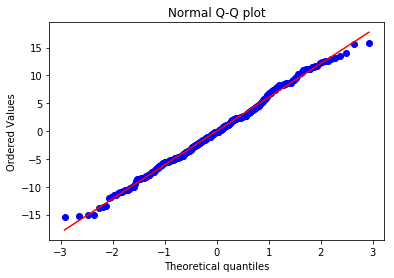

In [228]:
stats.probplot(res, dist="norm", plot=plt)
plt.title("Normal Q-Q plot");

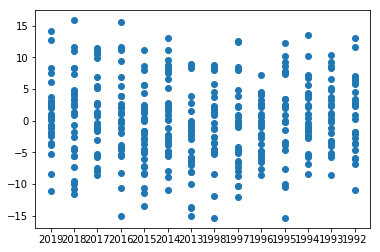

In [229]:
plt.scatter(y=res,x=combined_data['year']);

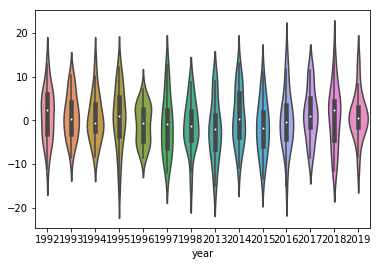

In [230]:
sns.violinplot(y=res,x=combined_data['year']);

In [231]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge #ordinary linear regression + w/ ridge regularization
from sklearn.preprocessing import StandardScaler, PolynomialFeatures



In [232]:

X, y = combined_data.drop('win_per',axis=1), combined_data['win_per']

X, X_test, y, y_test = train_test_split(X, y, test_size=.2, random_state=11) #hold out 20% of the data for final testing

#this helps with the way kf will generate indices below
X, y = np.array(X), np.array(y)

In [233]:
#run the CV
mean_r2s =[]
std_r2s =[]
lambs =[]
for n in  np.linspace(25,75,51):

    kf = KFold(n_splits=5, shuffle=True, random_state = 71)
    cv_lm_r2s, cv_lm_reg_r2s = [], [] #collect the validation results for both models
    cv_lm_poly_r2s=[]
    for train_ind, val_ind in kf.split(X,y):

        X_train, y_train = X[train_ind], y[train_ind]
        X_val, y_val = X[val_ind], y[val_ind] 

        #simple linear regression
        lm = LinearRegression()
        lm_reg = Ridge(alpha=n)

        lm.fit(X_train, y_train)
        cv_lm_r2s.append(lm.score(X_val, y_val))

        #ridge with feature scaling
        scaler = StandardScaler()
        X_train_scaled = scaler.fit_transform(X_train)
        X_val_scaled = scaler.transform(X_val)

        lm_reg.fit(X_train_scaled, y_train)
        cv_lm_reg_r2s.append(lm_reg.score(X_val_scaled, y_val))

        #polynomial regression
        poly = PolynomialFeatures(degree=2)

        X_train_poly = poly.fit_transform(X_train)
        X_val_poly = poly.transform(X_val)
        X_test_poly = poly.transform(X_test)

        lm_poly = LinearRegression()
        lm_poly.fit(X_train_poly, y_train)
        cv_lm_poly_r2s.append(lm_poly.score(X_val_poly, y_val))
        
        mean_r2s.append(np.mean(cv_lm_reg_r2s))
        std_r2s.append(np.std(cv_lm_reg_r2s))
        lambs.append(n)

    #

# print('Simple regression scores: ', cv_lm_r2s)
# print('Ridge scores: ', cv_lm_reg_r2s)
# print('Poly scores: ', cv_lm_poly_r2s,'\n')

# print(f'Simple mean cv r^2: {np.mean(cv_lm_r2s):.3f} +- {np.std(cv_lm_r2s):.3f}')
# print(f'Ridge mean cv r^2: {np.mean(cv_lm_reg_r2s):.3f} +- {np.std(cv_lm_reg_r2s):.3f}' ,)
# print(f'Poly mean cv r^2: {np.mean(cv_lm_poly_r2s):.3f} +- {np.std(cv_lm_poly_r2s):.3f}' ,)




/Users/williamyee/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/Users/williamyee/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/Users/williamyee/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/Users/williamyee/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/Users/williamyee/anaconda3/envs/py36/lib/py

/Users/williamyee/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/Users/williamyee/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/Users/williamyee/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/Users/williamyee/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/Users/williamyee/anaconda3/envs/py36/lib/py

/Users/williamyee/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/Users/williamyee/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/Users/williamyee/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/Users/williamyee/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/Users/williamyee/anaconda3/envs/py36/lib/py

/Users/williamyee/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/Users/williamyee/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/Users/williamyee/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/Users/williamyee/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/Users/williamyee/anaconda3/envs/py36/lib/py

/Users/williamyee/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/Users/williamyee/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/Users/williamyee/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/Users/williamyee/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/Users/williamyee/anaconda3/envs/py36/lib/py

/Users/williamyee/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/Users/williamyee/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/Users/williamyee/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/Users/williamyee/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/Users/williamyee/anaconda3/envs/py36/lib/py

/Users/williamyee/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/Users/williamyee/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/Users/williamyee/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/Users/williamyee/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/Users/williamyee/anaconda3/envs/py36/lib/py

/Users/williamyee/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/Users/williamyee/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/Users/williamyee/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/Users/williamyee/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/Users/williamyee/anaconda3/envs/py36/lib/py

/Users/williamyee/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/Users/williamyee/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/Users/williamyee/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/Users/williamyee/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/Users/williamyee/anaconda3/envs/py36/lib/py

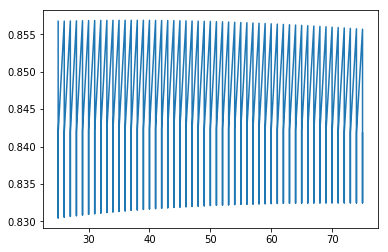

In [234]:
plt.plot(lambs,mean_r2s);

False